In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_mobile = pd.read_csv("BDD_initial/mobile_addiction_data.csv", sep="\t", index_col=0)
data_mobile.head()

,Country,Age,Gender,Occupation,Education_Level,Income_USD,Daily_Screen_Time_Hours,Phone_Unlocks_Per_Day,Social_Media_Usage_Hours,Gaming_Usage_Hours,...,Internet_Connection_Type,Primary_Device_Brand,Has_Screen_Time_Management_App,Self_Reported_Addiction_Level,Monthly_Data_Usage_GB,Has_Night_Mode_On,Age_First_Phone,Push_Notifications_Per_Day,Tech_Savviness_Score,Addiction_screen
User_ID,,,,,,,,,,,,,,,,,,,,,
1,India,32,Male,Salesperson,High School,"43865,49","5,81",75,"0,84","-1,55",...,5G,Other,No,Low,"16,43",Yes,16,106,"39,36",1
2,UK,26,Male,Artist,Master's,"41868,19","9,05",61,"3,13","2,5",...,4G,Samsung,Yes,Severe,"32,87",No,12,111,"9,45",1
3,Germany,70,Other,Doctor,High School,"59636,51","5,76",58,"2,12","1,96",...,WiFi,Samsung,Yes,Severe,"27,45",No,18,90,"50,27",1
4,UK,44,Female,Engineer,NaN,"39022,07","6,71",80,"1,6","2,7",...,3G,Apple,Yes,Moderate,"30,85",No,17,60,"30,82",1
5,Brazil,46,Other,Student,NaN,"-783,98","6,31",136,"1,51","1,73",...,3G,Xiaomi,No,High,"10,38",Yes,18,127,"21,7",1


In [4]:
for col in data_mobile.columns:
    try:
        data_mobile[col] = data_mobile[col].astype(str).str.replace(",", ".").astype(float)
    except:
        pass
addiction_map = {"Low": 1, "Moderate": 2, "High": 3, "Severe": 4}
if data_mobile["Self_Reported_Addiction_Level"].dtype == object:
    data_mobile["Self_Reported_Addiction_Level"] = data_mobile["Self_Reported_Addiction_Level"].map(addiction_map)

/var/folders/mt/445mmr793_qd4gnxxd5sl8180000gn/T/ipykernel_11298/3652463440.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


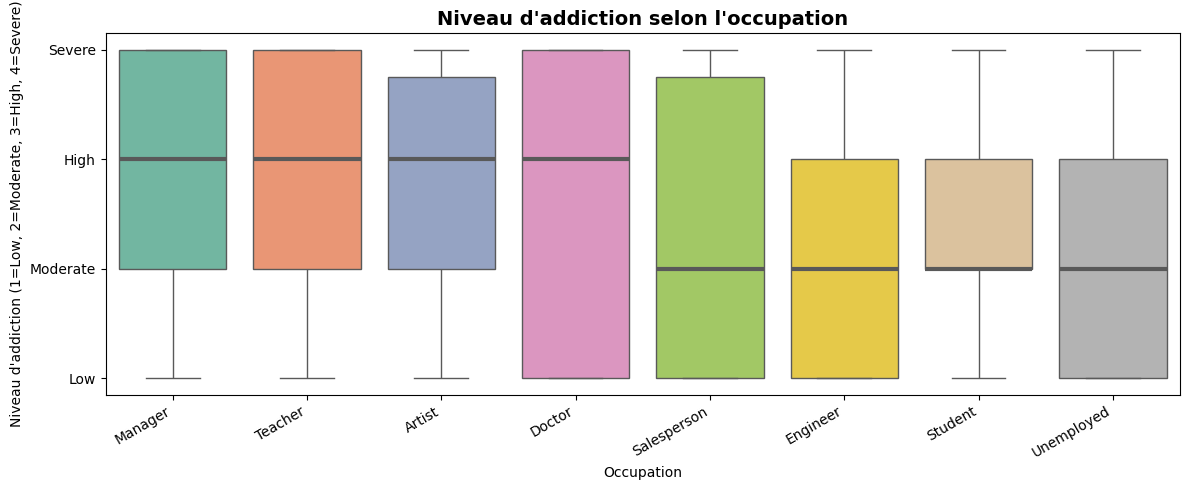

In [5]:
fig, ax = plt.subplots(figsize=(12, 5))

order = (data_mobile.groupby("Occupation")["Self_Reported_Addiction_Level"]
           .mean().sort_values(ascending=False).index)

sns.boxplot(
    data=data_mobile,
    x="Occupation",
    y="Self_Reported_Addiction_Level",
    order=order, palette="Set2", ax=ax,
    medianprops={"linewidth": 3}
)

ax.set_title("Niveau d'addiction selon l'occupation", fontsize=14, fontweight="bold")
ax.set_xlabel("Occupation")
ax.set_ylabel("Niveau d'addiction (1=Low, 2=Moderate, 3=High, 4=Severe)")
ax.set_yticks([1, 2, 3, 4])
ax.set_yticklabels(["Low", "Moderate", "High", "Severe"])
plt.xticks(rotation=30, ha="right")

plt.tight_layout()
plt.show()

/var/folders/mt/445mmr793_qd4gnxxd5sl8180000gn/T/ipykernel_11298/3940135410.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


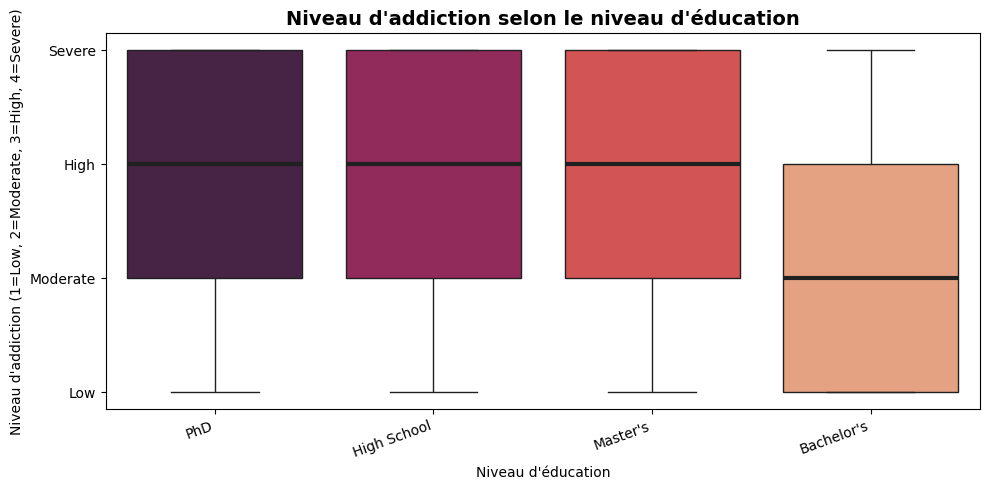

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))

order = (data_mobile.groupby("Education_Level")["Self_Reported_Addiction_Level"]
           .mean().sort_values(ascending=False).index)

sns.boxplot(
    data=data_mobile,
    x="Education_Level",
    y="Self_Reported_Addiction_Level",
    order=order, palette="rocket", ax=ax,
    medianprops={"linewidth": 3}
)

ax.set_title("Niveau d'addiction selon le niveau d'éducation", fontsize=14, fontweight="bold")
ax.set_xlabel("Niveau d'éducation")
ax.set_ylabel("Niveau d'addiction (1=Low, 2=Moderate, 3=High, 4=Severe)")
ax.set_yticks([1, 2, 3, 4])
ax.set_yticklabels(["Low", "Moderate", "High", "Severe"])
plt.xticks(rotation=20, ha="right")

plt.tight_layout()
plt.show()

/var/folders/mt/445mmr793_qd4gnxxd5sl8180000gn/T/ipykernel_11298/2202126503.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/mt/445mmr793_qd4gnxxd5sl8180000gn/T/ipykernel_11298/2202126503.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


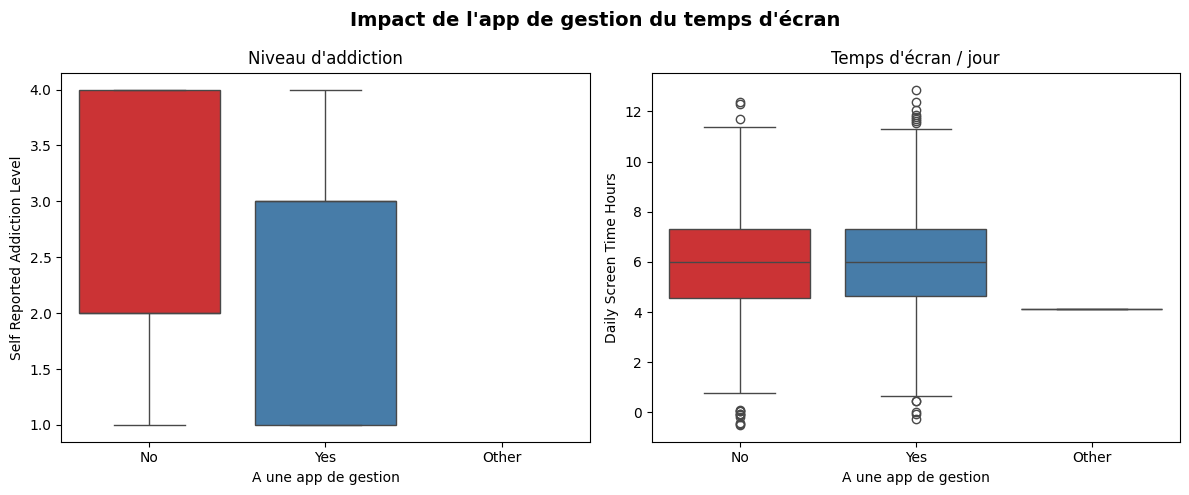

In [7]:
data_mobile["Daily_Screen_Time_Hours"] = pd.to_numeric(data_mobile["Daily_Screen_Time_Hours"], errors="coerce")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Impact de l'app de gestion du temps d'écran", fontsize=14, fontweight="bold")

for ax, col, title in zip(
    axes,
    ["Self_Reported_Addiction_Level", "Daily_Screen_Time_Hours"],
    ["Niveau d'addiction", "Temps d'écran / jour"]
):
    sns.boxplot(
        data=data_mobile,
        x="Has_Screen_Time_Management_App",
        y=col, palette="Set1", ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel("A une app de gestion")
    ax.set_ylabel(col.replace("_", " "))

plt.tight_layout()
plt.show()

/var/folders/mt/445mmr793_qd4gnxxd5sl8180000gn/T/ipykernel_11298/669156693.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


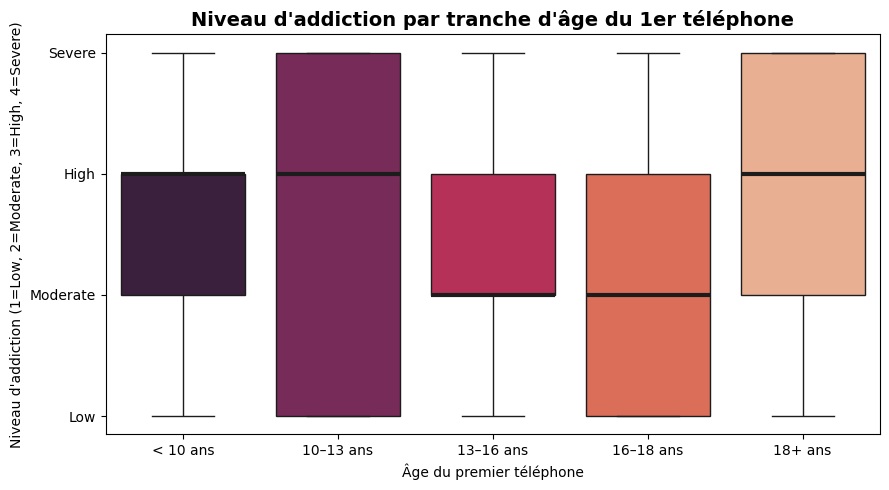

In [8]:
fig, ax = plt.subplots(figsize=(9, 5))

data_mobile["Age_First_Phone"] = pd.to_numeric(data_mobile["Age_First_Phone"], errors="coerce")

data_mobile["Age_First_Phone_Group"] = pd.cut(
    data_mobile["Age_First_Phone"],
    bins=[0, 10, 13, 16, 18, 99],
    labels=["< 10 ans", "10–13 ans", "13–16 ans", "16–18 ans", "18+ ans"]
)

sns.boxplot(
    data=data_mobile,
    x="Age_First_Phone_Group",
    y="Self_Reported_Addiction_Level",
    palette="rocket", ax=ax,
    medianprops={"linewidth": 3}
)

ax.set_title("Niveau d'addiction par tranche d'âge du 1er téléphone", fontsize=14, fontweight="bold")
ax.set_xlabel("Âge du premier téléphone")
ax.set_ylabel("Niveau d'addiction (1=Low, 2=Moderate, 3=High, 4=Severe)")
ax.set_yticks([1, 2, 3, 4])
ax.set_yticklabels(["Low", "Moderate", "High", "Severe"])

plt.tight_layout()
plt.show()

/var/folders/mt/445mmr793_qd4gnxxd5sl8180000gn/T/ipykernel_11298/2303682574.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top, x="Country", y="Daily_Screen_Time_Hours",
/var/folders/mt/445mmr793_qd4gnxxd5sl8180000gn/T/ipykernel_11298/2303682574.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top, x="Country", y="Self_Reported_Addiction_Level",


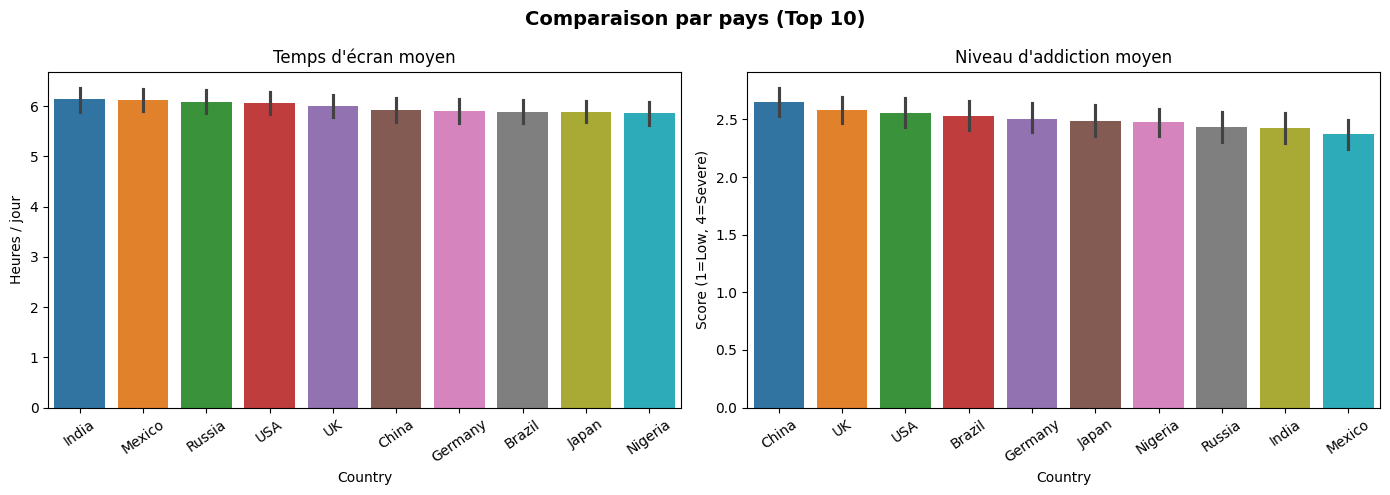

In [9]:
top_countries = data_mobile["Country"].value_counts().nlargest(10).index
df_top = data_mobile[data_mobile["Country"].isin(top_countries)].copy()
df_top["Daily_Screen_Time_Hours"] = pd.to_numeric(df_top["Daily_Screen_Time_Hours"], errors="coerce")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Comparaison par pays (Top 10)", fontsize=14, fontweight="bold")

order1 = (df_top.groupby("Country")["Daily_Screen_Time_Hours"]
                .mean().sort_values(ascending=False).index)
sns.barplot(data=df_top, x="Country", y="Daily_Screen_Time_Hours",
            order=order1, palette="tab10", ax=axes[0])
axes[0].set_title("Temps d'écran moyen")
axes[0].set_ylabel("Heures / jour")
axes[0].tick_params(axis="x", rotation=35)

order2 = (df_top.groupby("Country")["Self_Reported_Addiction_Level"]
                .mean().sort_values(ascending=False).index)
sns.barplot(data=df_top, x="Country", y="Self_Reported_Addiction_Level",
            order=order2, palette="tab10", ax=axes[1])
axes[1].set_title("Niveau d'addiction moyen")
axes[1].set_ylabel("Score (1=Low, 4=Severe)")
axes[1].tick_params(axis="x", rotation=35)

plt.tight_layout()
plt.show()